# Telecom Churn Case Study

## By Tushar Prasad

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Modelling

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

## Importing Packages

In [184]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Reading and understanding the data

In [2]:
# read data
df = pd.read_csv("telecom_churn_data.csv")


In [3]:
## seeing the data
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Checking the rows and columns
df.shape

(99999, 226)

In [5]:
#To get an idea of the numeric values
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# Checking the variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Data Cleaning

In [7]:
## Finding out columns with only 1 unique value

ls_1_unique = []

for i in df.columns:
    if df[i].nunique() <=1:
        print(i,df[i].nunique())
        ls_1_unique.append(i)

circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
last_date_of_month_6 1
last_date_of_month_7 1
last_date_of_month_8 1
last_date_of_month_9 1
std_og_t2c_mou_6 1
std_og_t2c_mou_7 1
std_og_t2c_mou_8 1
std_og_t2c_mou_9 1
std_ic_t2o_mou_6 1
std_ic_t2o_mou_7 1
std_ic_t2o_mou_8 1
std_ic_t2o_mou_9 1


In [8]:
## Now we can drop these columns as they will not be useful

df.drop(ls_1_unique,inplace=True,axis=1)

In [9]:
## Finding out columns with only 2 unique value, we can take them as categorical variables

for i in df.columns:
    if df[i].nunique() <=2:
        print(i,df[i].nunique())

night_pck_user_6 2
night_pck_user_7 2
night_pck_user_8 2
night_pck_user_9 2
fb_user_6 2
fb_user_7 2
fb_user_8 2
fb_user_9 2


In [10]:
## From the head we can see that there are various kinds of columns
## They can be seperated into different categories and then analysed

id_cols = ['mobile_number']
date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

In [11]:
print("Date cols: {}".format(len(date_cols)))
print("ID cols: {}".format(len(id_cols)))
print("Categorical cols: {}".format(len(cat_cols)))
print("Numerical cols: {}".format(len(num_cols)))

Date cols: 8
ID cols: 1
Categorical cols: 8
Numerical cols: 193


In [12]:
# checking to see if any columnns are missed
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

True


In [13]:
# looking for missing values
(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)

night_pck_user_6            74.846748
arpu_2g_6                   74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
count_rech_2g_6             74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
date_of_last_rech_data_6    74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
night_pck_user_7            74.428744
arpu_2g_7                   74.428744
total_rech_data_7           74.428744
arpu_3g_7                   74.428744
max_rech_data_7             74.428744
av_rech_amt_data_7          74.428744
count_rech_3g_7             74.428744
date_of_last_rech_data_7    74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
date_of_last_rech_data_9    74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
av_rech_amt_data_9          74.077741
total_rech_d

In [14]:
## From the above missing lists, we can see there is a lot of correlation between the kpis of the same months in  
## terms of missing values. Hence, there must be some logic behind it.

In [15]:
## Working for one particular month kpi where date_of_last_rech_data is null

cols_mon = [i for i in df.columns if '_6' in i]

In [16]:
df.loc[df['date_of_last_rech_data_6'].isnull(),cols_mon]

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
1,34.047,24.11,15.74,0.00,0.00,23.88,11.51,0.00,0.00,35.39,0.23,0.00,0.00,0.23,0.00,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,5.90,26.83,0.00,1.83,0.00,4,74,44,6/29/2014,44,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
2,167.690,11.54,143.33,0.00,0.00,7.19,29.34,24.11,0.00,60.66,4.34,41.81,1.48,47.64,0.00,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,139.33,370.04,0.21,0.00,0.93,5,168,86,6/17/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
3,221.338,99.91,123.31,0.00,0.00,73.68,107.43,1.91,0.00,183.03,26.23,2.99,0.00,29.23,0.00,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,45.99,280.08,0.59,0.00,0.00,10,230,60,6/28/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
5,50.258,50.16,19.28,0.00,0.00,50.16,16.39,0.00,0.00,66.56,0.00,0.00,2.88,2.88,0.00,0.00,0.00,69.44,28.73,49.19,0.00,77.93,0.00,0.00,77.03,77.03,155.39,0.43,0.00,0.00,2,120,120,6/19/2014,120,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
6,429.023,71.03,262.73,0.00,0.00,71.03,252.23,10.38,0.11,333.64,0.00,0.00,0.00,0.00,0.00,0.11,0.00,333.76,1857.99,248.64,20.24,2126.89,0.00,1.39,0.00,1.39,2128.41,0.00,0.00,0.11,15,499,90,6/28/2014,37,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.00,422.16,4.30,49.89,6.66,60.86,0.00,4.50,0.00,487.53,58.14,217.56,152.16,427.88,36.89,91.44,52.19,180.54,626.46,0.21,2.06,15.74,5,1580,1580,6/27/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
8,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.00,378.09,116.56,13.69,0.00,130.26,0.00,0.00,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.43,0.00,22.43,103.86,0.00,0.00,0.00,19,437,90,6/25/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
9,119.518,33.89,63.48,0.00,0.00,33.89,38.03,0.00,0.00,71.93,0.00,25.45,0.00,25.45,0.00,0.66,0.00,98.04,129.34,132.94,0.40,262.69,0.30,32.86,0.00,33.16,303.98,0.00,8.11,0.00,4,220,110,6/29/2014,110,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
10,0.400,0.00,0.13,0.00,0.00,0.00,0.13,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,26.35,0.00,26.35,0.00,0.00,0.00,0.00,26.35,0.00,0.00,0.00,1,0,0,6/14/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
11,298.126,439.06,160.16,0.00,0.00,26.63,47.44,0.00,0.00,74.08,412.43,97.96,0.00,510.39,0.00,14.74,0.00,599.23,24.39,33.64,0.00,58.04,44.88,6.91,0.00,51.79,111.74,0.56,0.00,1.33,6,366,110,6/18/2014,110,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN


In [17]:
df.loc[df['date_of_last_rech_data_6'].isnull(),cols_mon].isnull().sum()

arpu_6                          0
onnet_mou_6                  3344
offnet_mou_6                 3344
roam_ic_mou_6                3344
roam_og_mou_6                3344
loc_og_t2t_mou_6             3344
loc_og_t2m_mou_6             3344
loc_og_t2f_mou_6             3344
loc_og_t2c_mou_6             3344
loc_og_mou_6                 3344
std_og_t2t_mou_6             3344
std_og_t2m_mou_6             3344
std_og_t2f_mou_6             3344
std_og_mou_6                 3344
isd_og_mou_6                 3344
spl_og_mou_6                 3344
og_others_6                  3344
total_og_mou_6                  0
loc_ic_t2t_mou_6             3344
loc_ic_t2m_mou_6             3344
loc_ic_t2f_mou_6             3344
loc_ic_mou_6                 3344
std_ic_t2t_mou_6             3344
std_ic_t2m_mou_6             3344
std_ic_t2f_mou_6             3344
std_ic_mou_6                 3344
total_ic_mou_6                  0
spl_ic_mou_6                 3344
isd_ic_mou_6                 3344
ic_others_6   

In [18]:
## Hence we can see that where ever date_of_last_rech_data_6 is null, a lot of other columsn are also null
## Hence there is a correlation which can be extended to other months also.
## date_of_last_rech_data being null means that the user hasn't recharged his mobile data at all in that particular month
## Hence we can put all the metrics related to mobile data recharged as 0

ls_impute_0 = ['fb_user','night_pck_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g','count_rech_2g'
               ,'max_rech_data','total_rech_data']

In [19]:
for i in ls_impute_0:
    for j in df.columns:
        if i in j:
            df[j].fillna(0,inplace=True)

In [20]:
df.loc[df['date_of_last_rech_data_6'].isnull(),cols_mon].isnull().sum()

arpu_6                          0
onnet_mou_6                  3344
offnet_mou_6                 3344
roam_ic_mou_6                3344
roam_og_mou_6                3344
loc_og_t2t_mou_6             3344
loc_og_t2m_mou_6             3344
loc_og_t2f_mou_6             3344
loc_og_t2c_mou_6             3344
loc_og_mou_6                 3344
std_og_t2t_mou_6             3344
std_og_t2m_mou_6             3344
std_og_t2f_mou_6             3344
std_og_mou_6                 3344
isd_og_mou_6                 3344
spl_og_mou_6                 3344
og_others_6                  3344
total_og_mou_6                  0
loc_ic_t2t_mou_6             3344
loc_ic_t2m_mou_6             3344
loc_ic_t2f_mou_6             3344
loc_ic_mou_6                 3344
std_ic_t2t_mou_6             3344
std_ic_t2m_mou_6             3344
std_ic_t2f_mou_6             3344
std_ic_mou_6                 3344
total_ic_mou_6                  0
spl_ic_mou_6                 3344
isd_ic_mou_6                 3344
ic_others_6   

In [21]:
### Now we will analyse the calling data for a particular month
## Again we can see that there is a correlation

In [22]:
df.loc[df['onnet_mou_6'].isnull(),cols_mon].isnull().sum()


arpu_6                         0
onnet_mou_6                 3937
offnet_mou_6                3937
roam_ic_mou_6               3937
roam_og_mou_6               3937
loc_og_t2t_mou_6            3937
loc_og_t2m_mou_6            3937
loc_og_t2f_mou_6            3937
loc_og_t2c_mou_6            3937
loc_og_mou_6                3937
std_og_t2t_mou_6            3937
std_og_t2m_mou_6            3937
std_og_t2f_mou_6            3937
std_og_mou_6                3937
isd_og_mou_6                3937
spl_og_mou_6                3937
og_others_6                 3937
total_og_mou_6                 0
loc_ic_t2t_mou_6            3937
loc_ic_t2m_mou_6            3937
loc_ic_t2f_mou_6            3937
loc_ic_mou_6                3937
std_ic_t2t_mou_6            3937
std_ic_t2m_mou_6            3937
std_ic_t2f_mou_6            3937
std_ic_mou_6                3937
total_ic_mou_6                 0
spl_ic_mou_6                3937
isd_ic_mou_6                3937
ic_others_6                 3937
total_rech

In [23]:
## Sum of total outgoing minutes of usage
df.loc[df['onnet_mou_6'].isnull(),cols_mon]['total_og_mou_6'].sum()

0.0

In [24]:
## Sum of total incoming minutes of usage
df.loc[df['onnet_mou_6'].isnull(),cols_mon]['total_ic_mou_6'].sum()

0.0

In [25]:
### These are the people who have not made any calls
## We can see that there is no incoming or outgoing calls from the summations
## Hence, we can also impute these values with 0

ls_impute_0 = ['onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou',
       'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou',
       'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'spl_ic_mou',
       'isd_ic_mou', 'ic_others']

for i in ls_impute_0:
    for j in df.columns:
        if i in j:
            df[j].fillna(0,inplace=True)

In [26]:
## Only the date columns have null values now. we can drop them now along with the id columns

df.isnull().sum()[df.isnull().sum() > 0]

date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [27]:
df.drop(date_cols+id_cols,axis=1,inplace=True)

In [28]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

### Hence, the data has no missing values since we have treated all of them

## Filtering High Value Customers

In [30]:
## We will take greater than 70th percentile of avg rechange amount for June & July for a user to be considered a high value customer
## There are two kinds of recharges, 1. Mobile data recharge and 2. outgoing call recharge
## The second kind is given by total_rech_amt
## We need to calculate the first kind

In [31]:
## Finding the total mobile data recharge amount

df['total_data_rech_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

In [32]:
# Total recharge amount for June and July 

df['amt_data_6'] = df['total_rech_amt_6'] + df['total_data_rech_6']
df['amt_data_7'] = df['total_rech_amt_7'] + df['total_data_rech_7']

In [33]:
# average recharge done by customer in June and July

df['av_amt_data_6_7'] = (df['amt_data_6'] + df['amt_data_7'])/2

In [34]:
df[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,306.0,0.0,154.0,74.0,538.0
2,241.5,0.0,0.0,168.0,315.0
3,270.0,0.0,0.0,230.0,310.0
4,301.0,56.0,0.0,252.0,350.0


In [35]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df['av_amt_data_6_7'].quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [36]:
## Hence we will take only those rows which has avg recharge amount above 478

high_value_df = df[df['av_amt_data_6_7']>=df['av_amt_data_6_7'].quantile(0.7)]

In [37]:
print(df.shape[0])

print(high_value_df.shape[0])

99999
30001


In [38]:
## The number of rows have decreased from 99999 to 30001

In [39]:
# deleting variables created to filter high-value customers
high_value_df = high_value_df.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
high_value_df.shape

(30001, 201)

## Deriving The churned customers

In [40]:
## We will define the customer to be churned if he/she has not made any calls (total_ic_mou_9,total_og_mou_9)
## or hasn't used the mobile data (vol_2g_mb_9,vol_3g_mb_9) at all in september

# calculating total incoming and outgoing minutes of usage
high_value_df['total_calls_mou_9'] = high_value_df['total_ic_mou_9'] + high_value_df['total_og_mou_9']


# calculating 2g and 3g data consumption
high_value_df['total_internet_mb_9'] =  high_value_df['vol_2g_mb_9'] + high_value_df['vol_3g_mb_9']

In [41]:
# 0 - not churn, 1 - churn
high_value_df['churn'] = high_value_df.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [42]:
# deleting derived variables
churned_df = high_value_df.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [43]:
### Now we will find out the imbalance ratio of this customer churn problem

In [44]:
churned_df['churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

In [45]:
0.918636/0.081364

11.29044786392016

In [46]:
## Hence the problem has an imbalance ratio of 11.29 and 8.13% of churn ratio

In [47]:
churned_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,1
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.3

In [48]:
churned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 202 entries, arpu_6 to churn
dtypes: float64(168), int64(34)
memory usage: 46.5 MB


In [49]:
churned_df.isnull().sum().sort_values(ascending=False)[:5]

churn               0
spl_og_mou_9        0
loc_ic_t2t_mou_7    0
loc_ic_t2t_mou_6    0
total_og_mou_9      0
dtype: int64

we can see the data is all cleaned

### Delete the data from Sep month.

In [50]:
#Get all columns for september month
sep_cols = [col for col in churned_df.columns if '_9' in col]
sep_cols.append('sep_vbc_3g')
sep_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'sep_vbc_3g']

In [51]:
#Drop data from sep month
churned_df = churned_df.drop(sep_cols, axis=1)

In [52]:
#Lets check shape of data after dropping.
churned_df.shape

(30001, 152)

### Exploratory Data Analysis

In [53]:
#Let's understand data from Goodphase and Actionphase
churned_df['amt_data_6'] = churned_df['total_rech_amt_6'] + (churned_df['total_rech_data_6'] * churned_df['av_rech_amt_data_6'])
churned_df['amt_data_7'] = churned_df['total_rech_amt_7'] + (churned_df['total_rech_data_7'] * churned_df['av_rech_amt_data_7'])

churned_df['GoodPhase_amt_data'] = (churned_df['amt_data_6'] + churned_df['amt_data_7'])/2
churned_df['ActionPhase_amt_data'] = churned_df['total_rech_amt_8'] + (churned_df['total_rech_data_8'] * churned_df['av_rech_amt_data_8'])


In [54]:
#Dropping temporary columns
churned_df=churned_df.drop(['amt_data_6', 'amt_data_7'], axis=1)

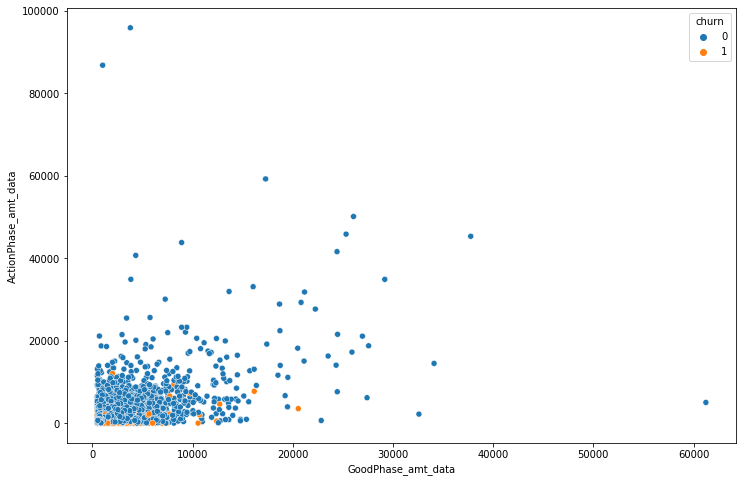

In [55]:
#Let's plot the distribution between Good Phase and Action Phase
plt.figure(figsize=(12,8))
sns.scatterplot(x='GoodPhase_amt_data',y='ActionPhase_amt_data',data=churned_df,hue='churn')

We can see churn customers usually spend less in the Action Phase.

In [56]:
churned_df['amt_data_diff'] = churned_df['GoodPhase_amt_data'] - churned_df['ActionPhase_amt_data']

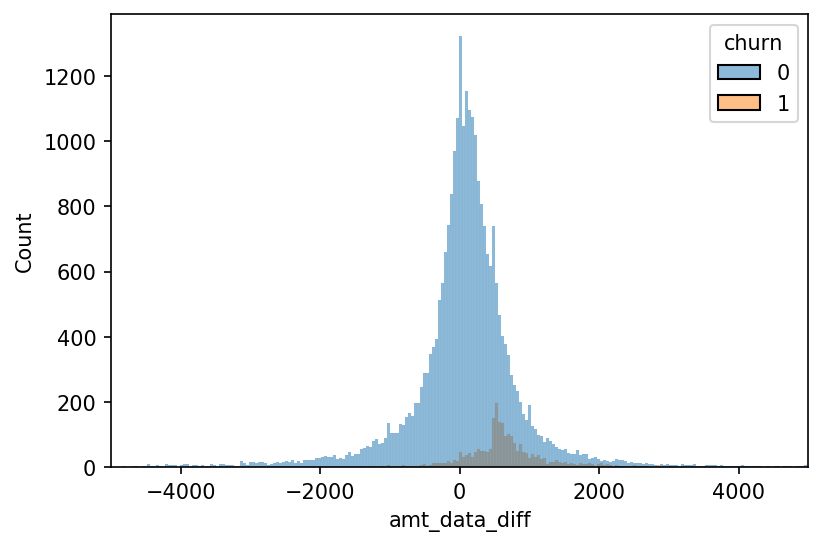

In [57]:
plt.figure(figsize=(6,4),dpi=150)
sns.histplot(data=churned_df, x='amt_data_diff', hue = 'churn')
plt.xlim(-5000,5000)
plt.show()

We can see most of the non-churns have zero spending difference in Good phase and Action Phase. But this is not the case with churns

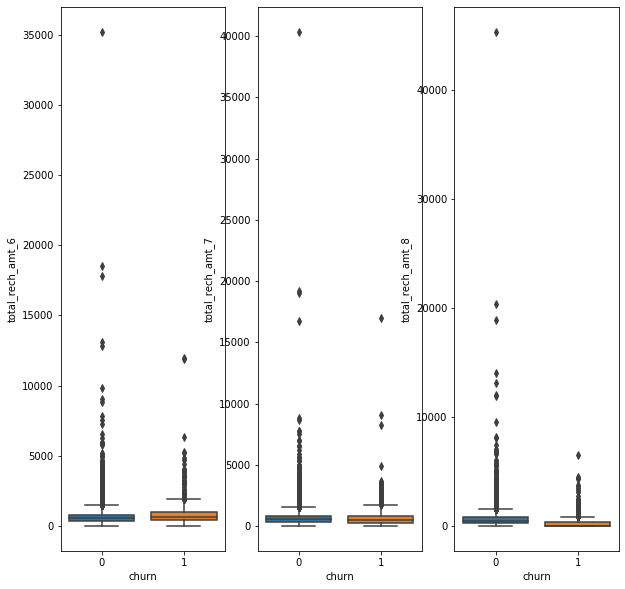

In [58]:
#Lets create box plot for total recharge amount.
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
sns.boxplot(data=churned_df, x='churn',y='total_rech_amt_6')
plt.subplot(1,3,2)
sns.boxplot(data=churned_df, x='churn',y='total_rech_amt_7')
plt.subplot(1,3,3)
sns.boxplot(data=churned_df, x='churn',y='total_rech_amt_8')

We can clearly see a exteme values in the data.
There are some extemely high value customer that are churned.

#### Outliers Treatment

+ There are only  few customers that are extremely high valued. Lets drop them to get more understanding of data.

In [59]:
#Setting maxlimit of 15000 and dropping these outlier records in the data. 
churned_df = churned_df[(churned_df['total_rech_amt_6']<15000) & (churned_df['total_rech_amt_7']<15000) & (churned_df['total_rech_amt_8']<15000)]


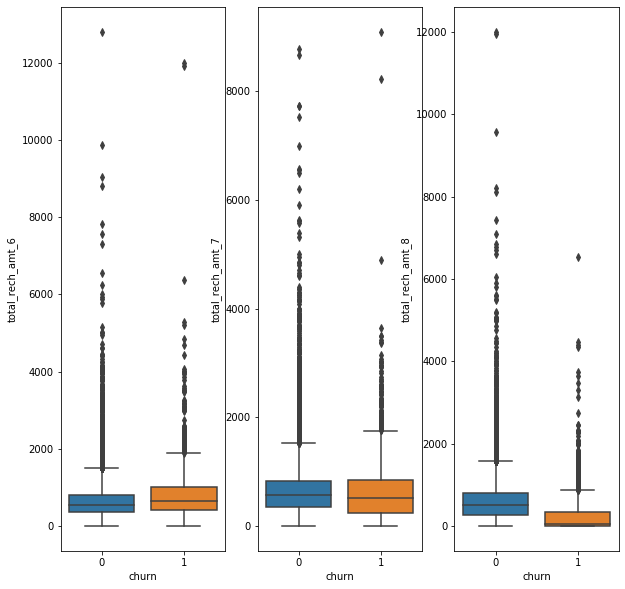

In [60]:
plt.figure(figsize=(10,10))
plt.ylim([0,15000])
plt.subplot(1,3,1)
sns.boxplot(data=churned_df, x='churn',y='total_rech_amt_6')
plt.subplot(1,3,2)
sns.boxplot(data=churned_df, x='churn',y='total_rech_amt_7')
plt.subplot(1,3,3)
sns.boxplot(data=churned_df, x='churn',y='total_rech_amt_8')

In [61]:
churned_df.shape

(29995, 155)

In [62]:
churned_df.describe(percentiles=[0.25,0.5,0.75,0.99,0.999], include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,GoodPhase_amt_data,ActionPhase_amt_data,amt_data_diff
count,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.00000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.00000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.00000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995

We can see there is huge difference in the top 0.1 percentile of data.

Churn details of customers high valued top 0.1 percentile:
0    0.7
1    0.3
Name: churn, dtype: float64


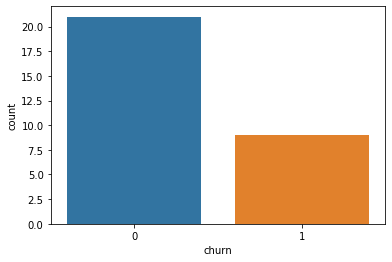

In [63]:
#lets have look of records of top 0.1 percentile data.
#Looking for data in top 30 'arpu_6'
print("Churn details of customers high valued top 0.1 percentile:")
print(churned_df[churned_df['arpu_6']>3700].churn.value_counts(normalize=True))
sns.countplot(x='churn', data=churned_df[churned_df['arpu_6']>3700] )

#### Observation
1. There is very large deviation between 99.9 and 0.1 percentile
2. But in top 0.1 percentile the churn ratio is 30 which is very high. And also high impact to business


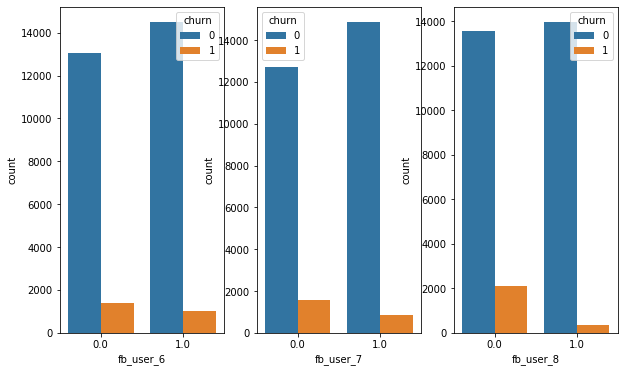

In [64]:
#Lets check for trend in customer with respect to FB service.
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.countplot(data=churned_df, x='fb_user_6', hue='churn')
plt.subplot(1,3,2)
sns.countplot(data=churned_df, x='fb_user_7', hue='churn')
plt.subplot(1,3,3)
sns.countplot(data=churned_df, x='fb_user_8', hue='churn')

We can see a trend where churn customers have opted-out from FB service.

Text(0.5, 1.0, 'AON vs Churn')

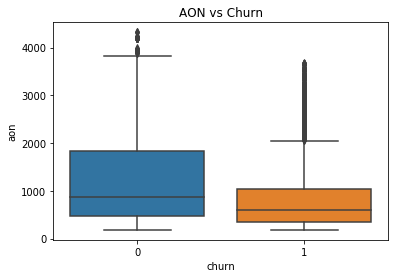

In [65]:
sns.boxplot(churned_df.churn, churned_df.aon)
plt.title("AON vs Churn")

In [66]:
##mean of total 3G usage per month churn vs Non-Churn
churned_df.groupby(['churn'])['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean()

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
churn,,,
0,349.888322,383.617927,374.923150
1,281.523053,218.600541,87.435504


In [67]:
#mean of total 2G usage per month churn vs Non-Churn
churned_df.groupby(['churn'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
churn,,,
0,127.853827,128.252532,113.262824
1,111.794496,89.770832,23.162234


## Feature Derivation

Steps for feature derivation:
* Data for same entity is seperated over different months. We need to find the trend.
* The Trend is the difference between the good phase and action phase.
* This will help to identify if usage is falling in action period.

In [68]:
#Copying data to new dataframe.
churned_derived = churned_df.copy()
churned_derived = churned_derived.drop(['GoodPhase_amt_data','ActionPhase_amt_data','amt_data_diff'], axis = 1)

In [121]:
#Reset Index.
churned_derived = churned_derived.reset_index(drop=True)

In [70]:
churned_derived['arpu_dif'] = ((churned_derived.arpu_6 + churned_derived.arpu_7)/2) - churned_derived.arpu_8

In [71]:
churned_derived.arpu_dif.describe()

count    29995.000000
mean        51.499373
std        324.379674
min      -5140.479000
25%        -83.152750
50%         40.776000
75%        180.163250
max       5811.052500
Name: arpu_dif, dtype: float64

In [72]:
churned_derived.groupby(['churn'])['arpu_dif'].mean()

churn
0     23.940205
1    362.725966
Name: arpu_dif, dtype: float64

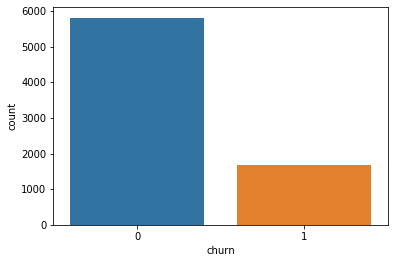

In [73]:
sns.countplot(x='churn', data=churned_derived[churned_derived['arpu_dif']>180] )

* Churn shows very high drop in the average revenue.
* Almost 2000 churn out of total 2440 churns are in top 75 percentile of average revenue difference.

In [74]:
churned_derived.sample()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,arpu_dif
46342,310.381,396.435,213.609,0.86,0.23,3.08,136.89,80.26,116.24,0.0,0.0,0.0,0.0,0.0,0.0,0.86,0.23,3.08,109.39,62.53,82.69,27.49,17.73,31.66,0.0,0.0,0.0,137.76,80.49,117.44,0.0,0.0,0.0,0.0,0.0,1.88,0.0,0.0,0.0,0.0,0.0,1.88,0.0,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,137.76,80.49,120.63,13.61,70.49,34.59,212.83,97.13,166.33,553.36,522.94,406.79,779.81,690.58,607.73,0.0,0.0,0.0,34.01,60.23,30.84,0.0,0.0,8.01,34.01,60.23,38.86,817.34,751.53,646.59,0.43,0.43,0.0,0.0,0.0,0.0,3.08,0.28,0.0,4,7,2,307,520,260,179,152,130,179,152,130,1.0,2.0,0.0,179.0,152.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,179.0,304.0,0.0,71.04,42.71,0.0,181.25,108.15,0.0,171.08,228.61,0.0,161.95,140.85,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,1,0,1.0,1.0,0.0,3210,83.85,127.91,211.01,0,139.799


In [75]:
#Extending this feature/trend derivation to all columns.

churned_derived['onnet_mou_dif'] = ((churned_derived.onnet_mou_6 + churned_derived.onnet_mou_7)/2) - churned_derived.onnet_mou_8

churned_derived['offnet_mou_dif'] = ((churned_derived.offnet_mou_6 + churned_derived.offnet_mou_7)/2) -churned_derived.offnet_mou_8 

churned_derived['roam_ic_mou_dif'] = ((churned_derived.roam_ic_mou_6 + churned_derived.roam_ic_mou_7)/2) - churned_derived.roam_ic_mou_8 

churned_derived['roam_og_mou_dif'] = ((churned_derived.roam_og_mou_6 + churned_derived.roam_og_mou_7)/2) - churned_derived.roam_og_mou_8

churned_derived['loc_og_mou_dif'] = ((churned_derived.loc_og_mou_6 + churned_derived.loc_og_mou_7)/2) - churned_derived.loc_og_mou_8

churned_derived['std_og_mou_dif'] = ((churned_derived.std_og_mou_6 + churned_derived.std_og_mou_7)/2) - churned_derived.std_og_mou_8

churned_derived['isd_og_mou_dif'] = ((churned_derived.isd_og_mou_6 + churned_derived.isd_og_mou_7)/2) - churned_derived.isd_og_mou_8

churned_derived['spl_og_mou_dif'] = ((churned_derived.spl_og_mou_6 + churned_derived.spl_og_mou_7)/2) - churned_derived.spl_og_mou_8

churned_derived['total_og_mou_dif'] = ((churned_derived.total_og_mou_6 + churned_derived.total_og_mou_7)/2) - churned_derived.total_og_mou_8

churned_derived['loc_ic_mou_dif'] = ((churned_derived.loc_ic_mou_6 + churned_derived.loc_ic_mou_7)/2) - churned_derived.loc_ic_mou_8

churned_derived['std_ic_mou_dif'] = ((churned_derived.std_ic_mou_6 + churned_derived.std_ic_mou_7)/2) - churned_derived.std_ic_mou_8

churned_derived['isd_ic_mou_dif'] = ((churned_derived.isd_ic_mou_6 + churned_derived.isd_ic_mou_7)/2) - churned_derived.isd_ic_mou_8

churned_derived['spl_ic_mou_dif'] = ((churned_derived.spl_ic_mou_6 + churned_derived.spl_ic_mou_7)/2) - churned_derived.spl_ic_mou_8

churned_derived['total_ic_mou_dif'] = ((churned_derived.total_ic_mou_6 + churned_derived.total_ic_mou_7)/2) - churned_derived.total_ic_mou_8

churned_derived['total_rech_num_dif'] = ((churned_derived.total_rech_num_6 + churned_derived.total_rech_num_7)/2) -churned_derived.total_rech_num_8

churned_derived['total_rech_amt_dif'] = ((churned_derived.total_rech_amt_6 + churned_derived.total_rech_amt_7)/2) - churned_derived.total_rech_amt_8

churned_derived['max_rech_amt_dif'] = ((churned_derived.max_rech_amt_6 + churned_derived.max_rech_amt_7)/2) - churned_derived.max_rech_amt_8

churned_derived['total_rech_data_dif'] = ((churned_derived.total_rech_data_6 + churned_derived.total_rech_data_7)/2) - churned_derived.total_rech_data_8 

churned_derived['max_rech_data_dif'] = ((churned_derived.max_rech_data_6 + churned_derived.max_rech_data_7)/2) - churned_derived.max_rech_data_8

churned_derived['av_rech_amt_data_dif'] = ((churned_derived.av_rech_amt_data_6 + churned_derived.av_rech_amt_data_7)/2) - churned_derived.av_rech_amt_data_8

churned_derived['vol_2g_mb_dif'] = ((churned_derived.vol_2g_mb_6 + churned_derived.vol_2g_mb_7)/2) - churned_derived.vol_2g_mb_8

churned_derived['vol_3g_mb_dif'] = ((churned_derived.vol_3g_mb_6 + churned_derived.vol_3g_mb_7)/2) - churned_derived.vol_3g_mb_8

In [76]:
churned_derived.groupby(['churn'])['vol_2g_mb_dif'].mean()

churn
0    14.790355
1    77.620430
Name: vol_2g_mb_dif, dtype: float64

In [77]:
churned_derived.groupby(['churn'])['vol_3g_mb_dif'].mean()

churn
0     -8.170026
1    162.626293
Name: vol_3g_mb_dif, dtype: float64

In [78]:
churned_derived.groupby(['churn'])['onnet_mou_dif'].mean()

churn
0     13.603956
1    217.590742
Name: onnet_mou_dif, dtype: float64

In [79]:
churned_derived.shape

(29995, 175)

In [80]:
churned_derived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29995 entries, 0 to 99997
Columns: 175 entries, arpu_6 to vol_3g_mb_dif
dtypes: float64(149), int64(26)
memory usage: 40.3 MB


## Modelling

In [81]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## Test Train Split

In [82]:
#Divide the test data into X and y variables
X = churned_derived.drop("churn", axis = 1)
y = churned_derived.churn
print(X.shape)
print(y.shape)

(29995, 174)
(29995,)


In [83]:
#Splitting data into test data and train data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20996, 174)
(20996,)
(8999, 174)
(8999,)


### Scaling the features using standard scaler for PCA

In [84]:
#Instantiate scaler object.
scaler = StandardScaler()

In [85]:
# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

#### Handling Imbalance data

In [86]:
y_train.value_counts()

0    19276
1     1720
Name: churn, dtype: int64

In [87]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

In [88]:
y_train_bal.value_counts()

1    19276
0    19276
Name: churn, dtype: int64

### Dimensionality Reduction - PCA

In [89]:
#intantiate PCA
pca = PCA(random_state=42)

#fit PCA
pca.fit(X_train_bal)

PCA(random_state=42)

In [90]:
pca.components_

array([[-1.17431356e-01, -7.99382903e-02,  1.46903355e-02, ...,
         2.80333131e-02,  1.91905464e-02,  9.57573467e-03],
       [ 1.07188812e-01,  1.78752029e-01,  2.24287128e-01, ...,
        -7.07121903e-02, -4.96738423e-02, -4.00656472e-02],
       [ 1.64415056e-01,  7.35279676e-02, -5.65402684e-02, ...,
         8.43493200e-02,  1.15326692e-02,  6.25767194e-02],
       ...,
       [-0.00000000e+00,  2.46330734e-16,  7.49480381e-17, ...,
        -1.03124836e-01,  3.70342682e-02,  4.40155225e-02],
       [ 0.00000000e+00, -1.02633370e-16,  1.12100676e-16, ...,
         2.84692006e-01,  2.76601594e-02, -1.65113157e-04],
       [ 0.00000000e+00,  3.08374223e-16, -5.33941873e-17, ...,
         1.06590850e-01, -1.20418897e-02,  5.08760487e-02]])

In [91]:
pca.explained_variance_ratio_

array([1.07486485e-01, 8.09089536e-02, 5.98386451e-02, 5.00590725e-02,
       4.55345874e-02, 3.65165405e-02, 3.20771173e-02, 3.00230102e-02,
       2.70514193e-02, 2.52358076e-02, 2.31605467e-02, 2.10655475e-02,
       1.93753947e-02, 1.65477412e-02, 1.63367385e-02, 1.52195190e-02,
       1.44817466e-02, 1.39518609e-02, 1.29279719e-02, 1.21682133e-02,
       1.15549262e-02, 1.12514617e-02, 1.11621514e-02, 1.04472621e-02,
       1.00044033e-02, 9.59410277e-03, 9.53036137e-03, 9.24442911e-03,
       8.85476607e-03, 8.55193290e-03, 8.36153635e-03, 8.25466652e-03,
       8.08640048e-03, 7.89113651e-03, 7.60067530e-03, 7.51251921e-03,
       7.27377814e-03, 6.78082509e-03, 6.51385801e-03, 6.29329605e-03,
       6.05088968e-03, 5.83584354e-03, 5.69879919e-03, 5.56783159e-03,
       5.37965473e-03, 5.28540884e-03, 4.97253632e-03, 4.83835568e-03,
       4.63207986e-03, 4.56113418e-03, 4.14123037e-03, 3.89023036e-03,
       3.87394342e-03, 3.79370635e-03, 3.74427733e-03, 3.58613926e-03,
      

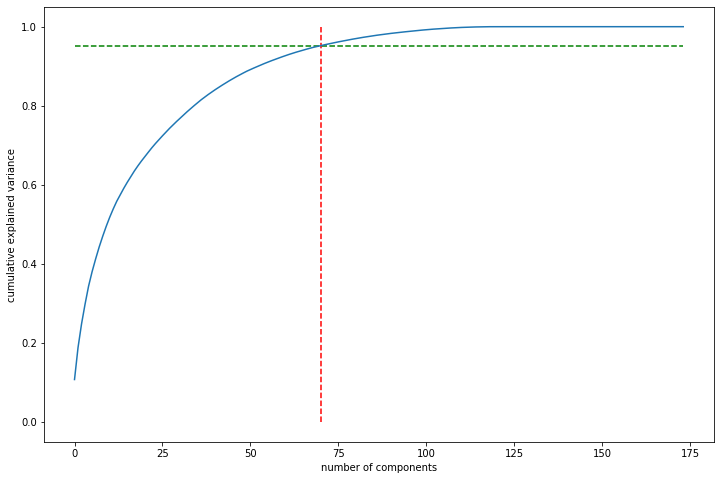

In [92]:
#Let's draw scree-plot for components and cummulative explained variance.
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.hlines(y=0.95, xmax=173, xmin=0, colors="g", linestyles="--")
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Above plot depics 70 components shows 95% of the variance.

In [93]:
#Performing PCA again for 95% Percent variance
pca2 = PCA(0.95)

In [94]:
#Transforming train data
X_train_pca = pca2.fit_transform(X_train_bal)
X_train_pca.shape

(38552, 70)

creating corelation matrix

In [95]:
corrmat = np.corrcoef(X_train_pca.transpose())

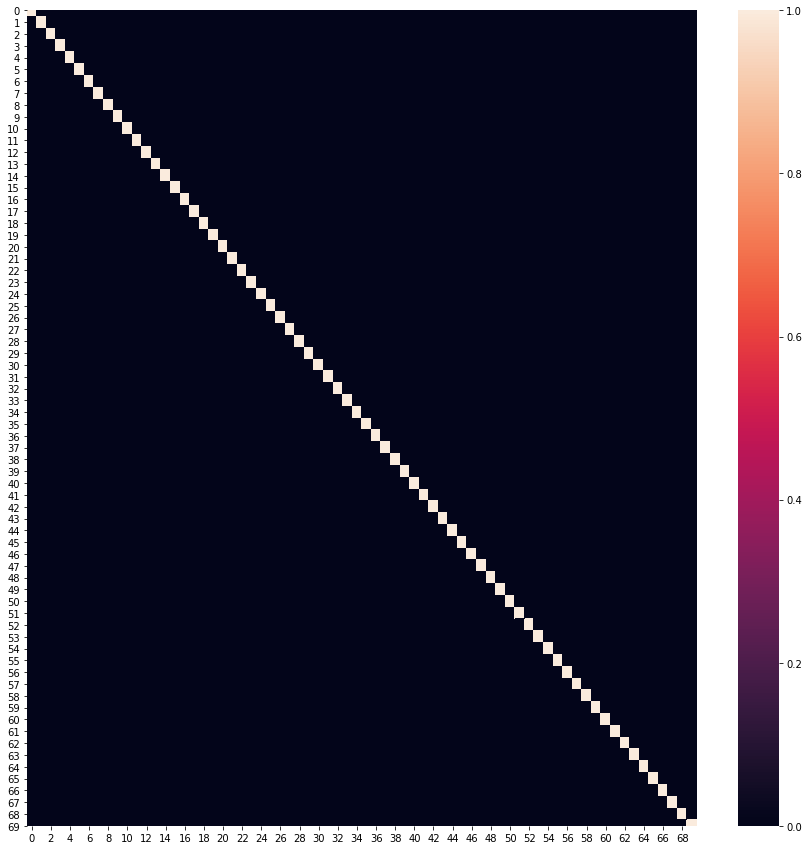

In [96]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat,)

Corelation are close to zero.

In [97]:
#Transforming test data
X_test_pca = pca2.transform(X_test)
X_test_pca.shape

(8999, 70)

### Applying Logistic Regression on Principal components

#### Metics Consideration:
+ As we are looking for the churn customers we would want to try to maximise the Recall/Sensitivity of the algorithm. so as to minimise the churn rate. And retain most of the customers.

In [98]:
#instantiate Logistic regression and fit on trainind data.
lr_pca1 = LogisticRegression()
lr_pca1.fit(X_train_pca,y_train_bal)

LogisticRegression()

In [99]:
#predicting on training set.
y_train_pred = lr_pca1.predict(X_train_pca)

In [100]:
#Lets create function to print all the metrics
def evaluate_performance(actual, predicted):
    confusion = metrics.confusion_matrix(actual, predicted)
    print("Confusion Matrix: \n", confusion)
    print("\n")
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Sensitivity/Recall \t:",(TP / float(TP+FN)))
    print("Specificity \t\t:",(TN / float(TN+FP)))
    print("Roc_auc_score \t\t:",(metrics.roc_auc_score(actual, predicted)))
    return None

In [101]:
#Create confusion matrix
evaluate_performance(y_train_bal, y_train_pred)

Confusion Matrix: 
 [[15832  3444]
 [ 2586 16690]]


Sensitivity/Recall 	: 0.8658435360033202
Specificity 		: 0.8213322266030296
Roc_auc_score 		: 0.843587881303175


In [102]:
#Applying gridsearch for optimization
params = {"C":[0.001, 0.01, 0.1, 1.0, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
 
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg,
                         params,
                         cv=5,verbose=1,
                         scoring="roc_auc")

logreg_cv.fit(X_train_pca,y_train_bal)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [103]:
logreg_cv.best_params_

{'C': 100, 'penalty': 'l2'}

In [104]:
logreg_cv.best_score_

0.9140388433553331

In [105]:
lr_pca2 = LogisticRegression(C=100, penalty='l2')
lr_pca2.fit(X_train_pca,y_train_bal)

LogisticRegression(C=100)

In [106]:
#define function for ROC Curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

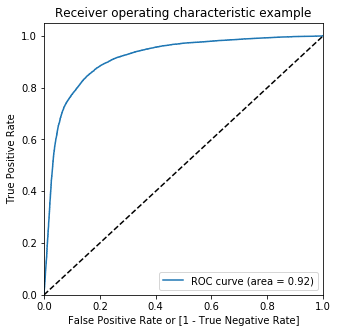

In [107]:
#predict probability for training set. And plot ROC curve.
y_train_pred = lr_pca2.predict(X_train_pca)
y_train_prob = lr_pca2.predict_proba(X_train_pca)[:,1]
draw_roc(y_train_bal, y_train_prob)

#### Finding optimal cut-off point to maximize the Recall/Sensitivity metric.

In [108]:
y_train_table = pd.DataFrame({'Actual':y_train_bal, 'Probability':y_train_prob, 'Predicted':y_train_pred})
y_train_table.head()

,Actual,Probability,Predicted
0,0,0.613002,1
1,0,0.769337,1
2,0,0.872671,1
3,0,0.007865,0
4,0,0.087437,0


In [109]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_table[i]= y_train_table.Probability.map(lambda x: 1 if x > i else 0)
y_train_table.head()

,Actual,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.613002,1,1,1,1,1,1,1,1,0,0,0
1,0,0.769337,1,1,1,1,1,1,1,1,1,0,0
2,0,0.872671,1,1,1,1,1,1,1,1,1,1,0
3,0,0.007865,0,1,0,0,0,0,0,0,0,0,0
4,0,0.087437,0,1,0,0,0,0,0,0,0,0,0


In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_table.Actual, y_train_table[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.716720  0.975306  0.458134
0.2   0.2  0.778092  0.956786  0.599398
0.3   0.3  0.811787  0.932403  0.691170
0.4   0.4  0.834016  0.903818  0.764215
0.5   0.5  0.843562  0.865792  0.821332
0.6   0.6  0.841902  0.811164  0.872640
0.7   0.7  0.831889  0.746887  0.916891
0.8   0.8  0.801152  0.653455  0.948848
0.9   0.9  0.645985  0.310438  0.981531


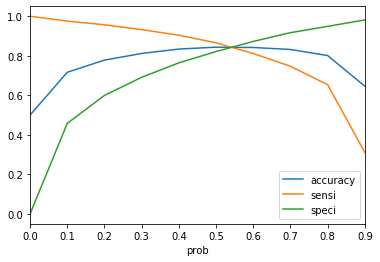

In [111]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As for the churn problem we would want to maximize the sensitivity. 0.4 looks optimum cut-off value

In [112]:
#apply cutoff probability
y_train_table['final_predicted'] = y_train_table.Probability.map( lambda x: 1 if x > 0.40 else 0)
y_train_table.head()

,Actual,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.613002,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.769337,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.872671,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.007865,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.087437,0,1,0,0,0,0,0,0,0,0,0,0


In [113]:
#Lets Evalute Training performace:
evaluate_performance(y_train_table.Actual, y_train_table.final_predicted)

Confusion Matrix: 
 [[14731  4545]
 [ 1854 17422]]


Sensitivity/Recall 	: 0.903818219547624
Specificity 		: 0.7642145673376219
Roc_auc_score 		: 0.8340163934426229


In [114]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_prob = lr_pca2.predict_proba(X_test_pca)[:,1]
y_test_table = pd.DataFrame({'Actual':y_test, 'Probability':y_test_prob})
y_test_table['predicted'] = y_test_table.Probability.map(lambda x: 1 if x > 0.40 else 0)
y_test_table.head()

,Actual,Probability,predicted
7526,0,0.022214,0
25786,0,0.018086,0
83006,0,0.113893,0
23431,0,0.017671,0
8695,0,0.369024,0


In [115]:
#Lets Evalute performace for Test data set:
evaluate_performance(y_test_table.Actual, y_test_table.predicted)

Confusion Matrix: 
 [[6323 1956]
 [ 112  608]]


Sensitivity/Recall 	: 0.8444444444444444
Specificity 		: 0.7637395820751298
Roc_auc_score 		: 0.8040920132597872


### Applying Random forest on PCA

In [122]:
#Instinataite Random Forest.
rf = RandomForestClassifier(n_estimators=50, max_depth=40, oob_score=True)

In [123]:
#Fit on training data
rf.fit(X_train_pca, y_train_bal)

RandomForestClassifier(max_depth=40, n_estimators=50, oob_score=True)

In [124]:
#Check out of bag score.
rf.oob_score_

0.9557221415231376

#### Apply grid search to optimize the model.

In [125]:
#Model for grid search.
rf1 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [126]:
#Optimal Max depth
params1 = {
    'max_depth': [10,20,50],
    #'min_samples_leaf': [10,20,50,100,200],
    #'n_estimators': [10, 50, 100]
}

grid_search_rf1 = GridSearchCV(estimator=rf1,
                           param_grid=params1,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")
grid_search_rf1.fit(X_train_pca, y_train_bal)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1, param_grid={'max_depth': [10, 20, 50]},
             scoring='recall', verbose=1)

In [127]:
#Find the best score
grid_search_rf1.best_score_

0.9736978626271011

In [128]:
#Find the best estimator
grid_search_rf1.best_estimator_

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [129]:
#Calculate performace on train data
evaluate_performance(y_train_bal,grid_search_rf1.predict(X_train_pca))

Confusion Matrix: 
 [[18902   374]
 [    0 19276]]


Sensitivity/Recall 	: 1.0
Specificity 		: 0.980597634363976
Roc_auc_score 		: 0.990298817181988


In [130]:
#Calculate the performace on the test set.
evaluate_performance(y_test,grid_search_rf1.predict(X_test_pca))

Confusion Matrix: 
 [[7742  537]
 [ 299  421]]


Sensitivity/Recall 	: 0.5847222222222223
Specificity 		: 0.9351370938519145
Roc_auc_score 		: 0.7599296580370684


Model is highly overfitting the data.

In [131]:
#Genralizing the  model.
params2 = {
    'max_depth': [20],
    'min_samples_leaf': [10,50,100,200,500]
}

grid_search_rf2 = GridSearchCV(estimator=rf1,
                           param_grid=params2,
                           cv = 4,
                           n_jobs=-1, verbose=2, scoring="recall")

grid_search_rf2.fit(X_train_pca, y_train_bal)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20],
                         'min_samples_leaf': [10, 50, 100, 200, 500]},
             scoring='recall', verbose=2)

In [132]:
grid_search_rf2.best_score_

0.9352562772359411

In [133]:
grid_search_rf2.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [134]:
evaluate_performance(y_train_bal,grid_search_rf2.predict(X_train_pca))

Confusion Matrix: 
 [[18393   883]
 [  360 18916]]


Sensitivity/Recall 	: 0.9813239261257523
Specificity 		: 0.954191741025109
Roc_auc_score 		: 0.9677578335754307


In [135]:
evaluate_performance(y_test,grid_search_rf2.predict(X_test_pca))

Confusion Matrix: 
 [[7633  646]
 [ 246  474]]


Sensitivity/Recall 	: 0.6583333333333333
Specificity 		: 0.9219712525667351
Roc_auc_score 		: 0.7901522929500342


In [136]:
params3 = {
    'max_depth': [20],
    'min_samples_leaf': [10,20],
    'max_features' : [5,10,30,50]
}

grid_search_rf3 = GridSearchCV(estimator=rf1,
                           param_grid=params3,
                           cv = 4,
                           n_jobs=-1, verbose=2, scoring="recall")

grid_search_rf3.fit(X_train_pca, y_train_bal)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': [5, 10, 30, 50],
                         'min_samples_leaf': [10, 20]},
             scoring='recall', verbose=2)

In [137]:
grid_search_rf3.best_score_

0.9383170782319983

In [138]:
grid_search_rf3.best_estimator_

RandomForestClassifier(max_depth=20, max_features=30, min_samples_leaf=10,
                       n_jobs=-1, random_state=42)

In [139]:
evaluate_performance(y_train_bal,grid_search_rf3.predict(X_train_pca))

Confusion Matrix: 
 [[18429   847]
 [  307 18969]]


Sensitivity/Recall 	: 0.9840734592239053
Specificity 		: 0.9560593484125337
Roc_auc_score 		: 0.9700664038182194


In [140]:
evaluate_performance(y_test,grid_search_rf3.predict(X_test_pca))

Confusion Matrix: 
 [[7626  653]
 [ 221  499]]


Sensitivity/Recall 	: 0.6930555555555555
Specificity 		: 0.9211257398236502
Roc_auc_score 		: 0.8070906476896029


In [141]:
params4 = {
    'max_depth': [20],
    'min_samples_leaf': [10],
    'max_features' : [30],
    'min_samples_split': [5,10,20,50]
}

grid_search_rf4 = GridSearchCV(estimator=rf1,
                           param_grid=params4,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

grid_search_rf4.fit(X_train_pca, y_train_bal)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': [30],
                         'min_samples_leaf': [10],
                         'min_samples_split': [5, 10, 20, 50]},
             scoring='recall', verbose=1)

In [142]:
grid_search_rf4.best_score_

0.9383170782319983

In [143]:
grid_search_rf4.best_estimator_

RandomForestClassifier(max_depth=20, max_features=30, min_samples_leaf=10,
                       min_samples_split=5, n_jobs=-1, random_state=42)

In [144]:
evaluate_performance(y_train_bal,grid_search_rf4.predict(X_train_pca))

Confusion Matrix: 
 [[18429   847]
 [  307 18969]]


Sensitivity/Recall 	: 0.9840734592239053
Specificity 		: 0.9560593484125337
Roc_auc_score 		: 0.9700664038182194


In [145]:
evaluate_performance(y_test,grid_search_rf4.predict(X_test_pca))

Confusion Matrix: 
 [[7626  653]
 [ 221  499]]


Sensitivity/Recall 	: 0.6930555555555555
Specificity 		: 0.9211257398236502
Roc_auc_score 		: 0.8070906476896029


As we can observe Random forest algorithm tends to learn the data. And that leads to overfitting of the data.

### Conclusion
+ Recall/Sensitivity metrics observed from both the model on test data are as follows:
    - Logistic Regression  :- **0.84**
    - Random Forest       :- **0.69**
+ We can observe Logistic regression model is more generalized compared to Random Forest model
+ Hence, we can say we have better results on __Logistic regression__ model.

# Interpretation

- Now we will try to see which features are most important to us inorder to predict churn. 
- We have used an XGBoost model
- We have used feature importance to see the the required features

In [146]:
#Divide the test data into X and y variables
X = churned_derived.drop("churn", axis = 1)
y = churned_derived.churn
print(X.shape)
print(y.shape)

(29995, 174)
(29995,)


In [147]:
#Splitting data into test data and train data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20996, 174)
(20996,)
(8999, 174)
(8999,)


In [148]:
#Instantiate scaler object.
scaler = StandardScaler()

In [149]:
# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

In [150]:
y_train.value_counts()

0    19276
1     1720
Name: churn, dtype: int64

In [151]:
## Making sure the data is balanced

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

In [152]:
## Hence, confimed

y_train_bal.value_counts()

1    19276
0    19276
Name: churn, dtype: int64

In [153]:
## Importing XGBoost

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [154]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train_bal, y_train_bal)

XGBClassifier()

In [155]:
## Finding the important features

importance = pd.DataFrame(zip(X.columns, model.feature_importances_),columns=['columns','importance'])


importance = importance.sort_values('importance',ascending=False)

In [157]:
importance

,columns,importance
65,loc_ic_mou_8,0.114863
80,total_ic_mou_8,0.090356
95,total_rech_amt_8,0.085572
151,arpu_dif,0.050009
14,roam_og_mou_8,0.049745
146,fb_user_8,0.048992
98,max_rech_amt_8,0.030970
167,total_rech_amt_dif,0.021439
160,total_og_mou_dif,0.018285
101,last_day_rch_amt_8,0.015885


In [158]:
## From the importance df we can see that we have gotten the list of how important features are.
## We will extract top 30 features from our model. 

# extract top 'n' features
top_n = 30
top_features = importance[['columns']][0:top_n]['columns'].unique()

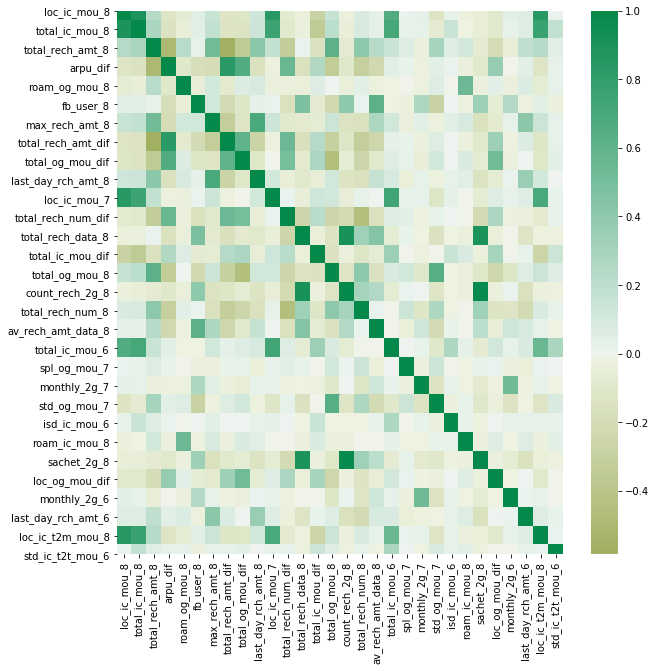

In [188]:
plt.rcParams["figure.figsize"] = (10,10)
mycmap = sns.diverging_palette(100, 500, s=99, center="light", as_cmap=True)
sns.heatmap(data=X[top_features].corr(), center=0.0, cmap=mycmap)

In [160]:
## Now from the heatmap, we will find the ten most important features which aren't heavily correlated with each other

columns = ['loc_ic_mou_8','total_rech_amt_8','roam_og_mou_8','arpu_dif','fb_user_8','max_rech_amt_8','total_rech_num_dif','total_rech_data_8','total_ic_mou_dif','total_rech_num_8','total_og_mou_8']

### Now we have 10 features which we find very important and aren't heaviliy correlated. We know how important these features are and their correlations but we don't know whether they are positively or negatively correlated

#### Hence, to solve this problem, we will build a logistic regression model like we did earlier on these top features to see how they affect the business case

In [161]:
## filtering the new columns
X_new = X[columns]

In [162]:
#Splitting data into test data and train data.
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20996, 11)
(20996,)
(8999, 11)
(8999,)


In [163]:
#Instantiate scaler object.
scaler = StandardScaler()

In [164]:
# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

In [165]:
## Making sure the data is balanced

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

In [166]:
#Applying gridsearch for optimization
params = {"C":[0.001, 0.01, 0.1, 1.0, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
 
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg,
                         params,
                         cv=5,verbose=1,
                         scoring="roc_auc")

logreg_cv.fit(X_train_bal,y_train_bal)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [167]:
## best parameters

logreg_cv.best_params_

{'C': 1000, 'penalty': 'l2'}

In [168]:
## best AUC score

logreg_cv.best_score_

0.8869039375924441

In [169]:
def evaluate_performance(actual, predicted):
    confusion = metrics.confusion_matrix(actual, predicted)
    print("Confusion Matrix: \n", confusion)
    print("\n")
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Sensitivity/Recall \t:",(TP / float(TP+FN)))
    print("Specificity \t\t:",(TN / float(TN+FP)))
    print("Roc_auc_score \t\t:",(metrics.roc_auc_score(actual, predicted)))
    return None

In [170]:
## Evaluating the test performance to see if the model is good or not

evaluate_performance(y_test,logreg_cv.predict(X_test))

Confusion Matrix: 
 [[6776 1503]
 [ 135  585]]


Sensitivity/Recall 	: 0.8125
Specificity 		: 0.8184563353061964
Roc_auc_score 		: 0.8154781676530982


In [171]:
## Seeing how these top features affect our business case

pd.DataFrame(zip(columns,list(logreg_cv.best_estimator_.coef_[0])),columns=['columns','coefficients'])

,columns,coefficients
0,loc_ic_mou_8,-1.925124
1,total_rech_amt_8,-0.059991
2,roam_og_mou_8,0.193088
3,arpu_dif,0.310605
4,fb_user_8,-0.511576
5,max_rech_amt_8,-0.062892
6,total_rech_num_dif,0.271056
7,total_rech_data_8,-0.364375
8,total_ic_mou_dif,0.294366
9,total_rech_num_8,-0.312520


## Graphical Depictions of these relations

#### Analysis of loc_ic_mou_8

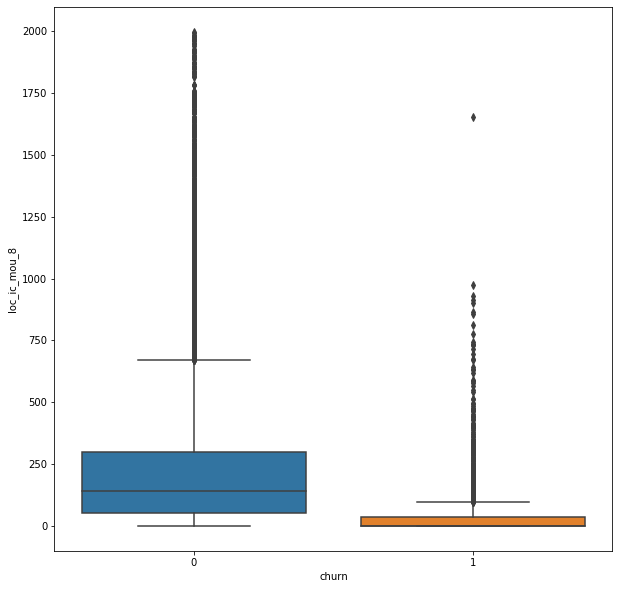

In [173]:
sns.boxplot(x="churn", y="loc_ic_mou_8", data=churned_df[churned_df['loc_ic_mou_8']<2000])

#### Minutes of local incoming drop down heavily in the action phase for churned customers

#### Analysis of fb_user_8

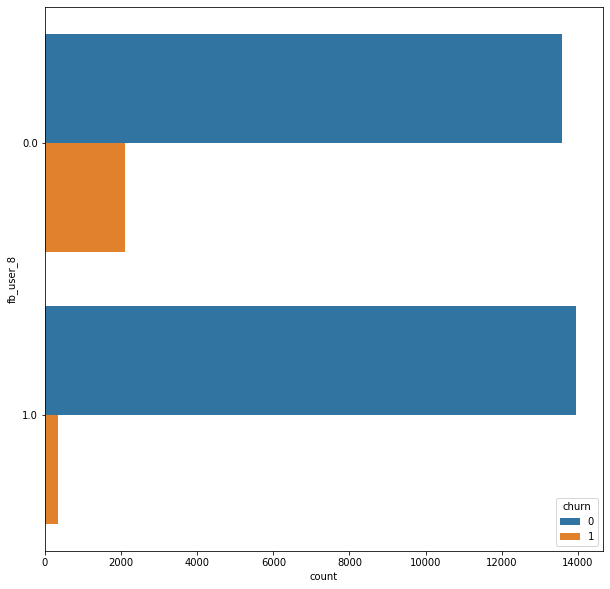

In [175]:
sns.countplot(y="fb_user_8", data=churned_df,hue='churn');

#### No of people taking service scheme to avail FB drops a lot for churned users in the action phase

#### Analysis of roam_og_mou_8

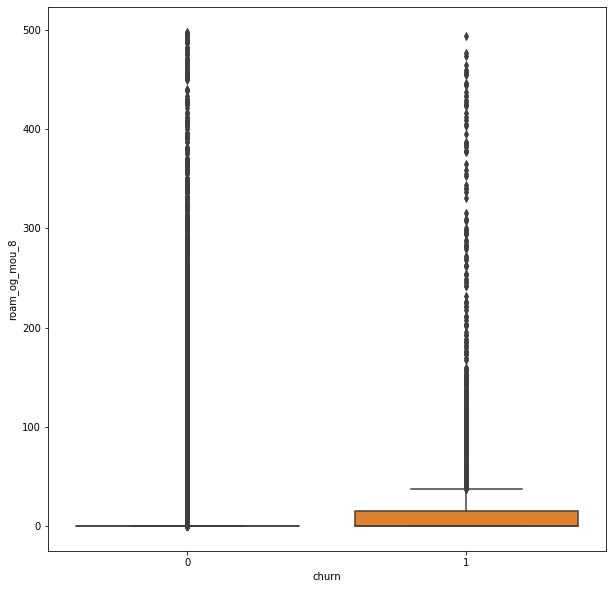

In [178]:
sns.boxplot(x="churn", y="roam_og_mou_8", data=churned_df[churned_df['roam_og_mou_8']<500])

#### Number of minutes of outgoing during roaming zones increase when the customer is going to be churned

#### Analysis of arpu_dif

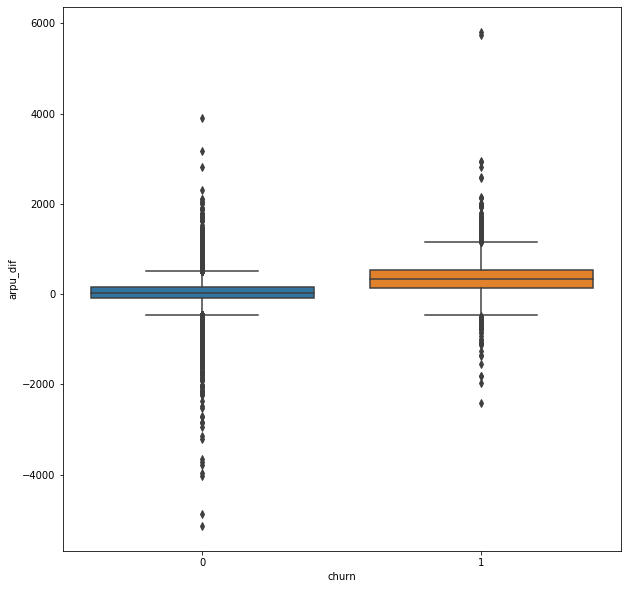

In [183]:
sns.boxplot(x="churn", y="arpu_dif", data=churned_derived)

#### The difference of ARPU between the good months and action months increase when the customer will churn

## Recommended Strategies

1. Features like loc_ic_mou_8 and total_ic_mou_8 decrease a lot for churned customers during the action phase. This means the amount of calls which come to them reduce a lot. This means they are probably thinking about changing the supplier. We can prove them with more beneficial offers and packs


2. The total_rech_amt also decreases. We should provide them with offers which are more affordable.


3. Features like roam_og_mou_8 increase in minutes for churned customers. This might be due to the fact that the user is shifting his geographical locations. We can provide them offers and good support service for the different geolocation as well to make them feel comfortable.


4. The number of users who avail for the FB service decrease a lot if they are planning to terminate. This is a field that we should monitor carefully. Maybe provide them with discount services.


5. Most of the difference fields are postively correlated with churn like arpu_dif. This means that the arpu for the average of good months is much higher than the arpu of the action month which decreases. Hence, this drop off is another thing we can monitor. Maybe provide them with affordable rates.